**MOH. KHISANUL FAKHRUDIN AKBAR** <BR>
**JCDS 0512** <BR>
**New York City TLC Trip Analyst (CAPSTONE 2)**



---

# Latar Belakang

New York City (NYC) adalah salah satu kota metropolitan terbesar dan tersibuk di dunia, dengan sistem transportasi yang sangat kompleks. Di antara berbagai moda transportasi yang tersedia, layanan taksi telah menjadi bagian integral dari mobilitas masyarakat, baik bagi penduduk lokal maupun wisatawan. Untuk memastikan operasional taksi berjalan dengan baik serta memenuhi kebutuhan regulasi, New York City Taxi and Limousine Commission (NYC TLC) mengelola sistem pencatatan perjalanan taksi secara terstruktur. Setiap perjalanan yang dilakukan oleh taksi di NYC dicatat dalam database yang disebut NYC TLC Trip Record

## Pernyataan Masalah

Sebagai seorang konsumen yang telah memiliki data yang telah disediakan dengan memadukan ilmu *data analyst* konsumen ingin mengetahui **faktor apa saja yang dapat mempengaruhi tarif perjalanan**. Dengan analisis ini diharapkan menjadi masukan kepada konsumen kapan saatnya melakukan perjalanan

# Data

Untuk menjawab pertanyaan diatas kita dapat menggunakan data set NYC TLC Trip record yang dapat di unduh [disini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

Dataset ini memuat berbagai informasi penting seperti waktu dan lokasi penjemputan serta pengantaran, jumlah penumpang, jarak perjalanan, tarif, metode pembayaran, serta status perjalanan. Ada 20 kolom pada dataset ini yaitu:
 * `VendorID` → Kode penyedia layanan taksi
 * `lpep_pickup_datetime` → Waktu penumpang naik (meter menyala).
 * `lpep_dropoff_datetime` → Waktu penumpang turun (meter mati).
 * `Passenger_count` → Jumlah penumpang.
 * `Trip_distance` → Jarak perjalanan dalam mil.
 * `PULocationID` → ID zona taksi tempat penumpang naik.
 * `DOLocationID` → ID zona taksi tempat penumpang turun.
 * `RateCodeID` → Kode tarif yang berlaku.
 * `Store_and_fwd_flag` → Indikator apakah data perjalanan disimpan di memori sebelum dikirim ke server.
 * `Payment_type` → Metode pembayaran
 * `Fare_amount` → Tarif berdasarkan waktu dan jarak.
 * `extra` → Biaya tambahan.
 * `MTA_tax` → Pajak MTA ($0.50).
 * `Improvement_surcharge` → Pajak tambahan per perjalanan ($0.30).
 * `Tip_amount` → Tips (hanya untuk pembayaran kartu kredit).
 * `Tolls_amount` → Total biaya tol dalam perjalanan.
 * `ehail_fee` → Total biaya aplikasi ehail.
 * `Total_amount` → Total biaya perjalanan (tidak termasuk tips tunai).
 * `Trip_type` → Kode jenis perjalanan.
 * `Congestion_surcharge` → adalah biaya tambahan untuk mengurangi kemacetan

In [6]:
# import libary yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record:

In [4]:
df = pd.read_csv("NYC TLC Trip Record.csv", low_memory=False)
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

In [35]:
print(f"Dataset ini memiliki jumlah baris: {df.shape[0]}, dan jumlah kolom: {df.shape[1]}")
df.info()

Dataset ini memiliki jumlah baris: 68211, dan jumlah kolom: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  floa

In [102]:
print("Jumlah baris kosong disetiap kolom:")
missing_value = df.isnull().sum()
# missing_value = missing_value[missing_value>0]
missing_value

Jumlah baris kosong disetiap kolom:


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [20]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [34]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes,  df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'type','Number of Unique', 'Unique Sample'], data=listItem)
tabel1Desc

,Column Name,type,Number of Unique,Unique Sample
0,VendorID,int64,2,"[2, 1]"
1,lpep_pickup_datetime,object,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,object,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:1

Insight:
* Dataset ini memiliki 20 kolom dan jumlah baris sebanyak 68211 baris
* Dataset ini memiliki nilai kosong yang diwakili dengan nan dan tersebar pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`
* Pada kolom `ehail_fee` semua barisnya berisi nan jadi lebih baik di drop saja
* Pada `RatecodeID` data seharusnya dalam rentang 1-6, namun ada data yang memiliki nilai 99 (diluar kategori)
* Pada `lpep_pickup_datetime`	dan `lpep_dropoff_datetime` seharusnya memiliki tipe data datetime bukan string jadi perlu dicasting

### Missing Value

In [104]:
# persentase missing value di tiap kolom
missing_value = missing_value[missing_value>0]
display("Jumlah baris kosong:", missing_value, "Persentase: ", missing_value/df.shape[0]*100)

'Jumlah baris kosong:'

store_and_fwd_flag       4324
RatecodeID               4324
passenger_count          4324
ehail_fee               68211
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

'Persentase: '

store_and_fwd_flag        6.339154
RatecodeID                6.339154
passenger_count           6.339154
ehail_fee               100.000000
payment_type              6.339154
trip_type                 6.353814
congestion_surcharge      6.339154
dtype: float64

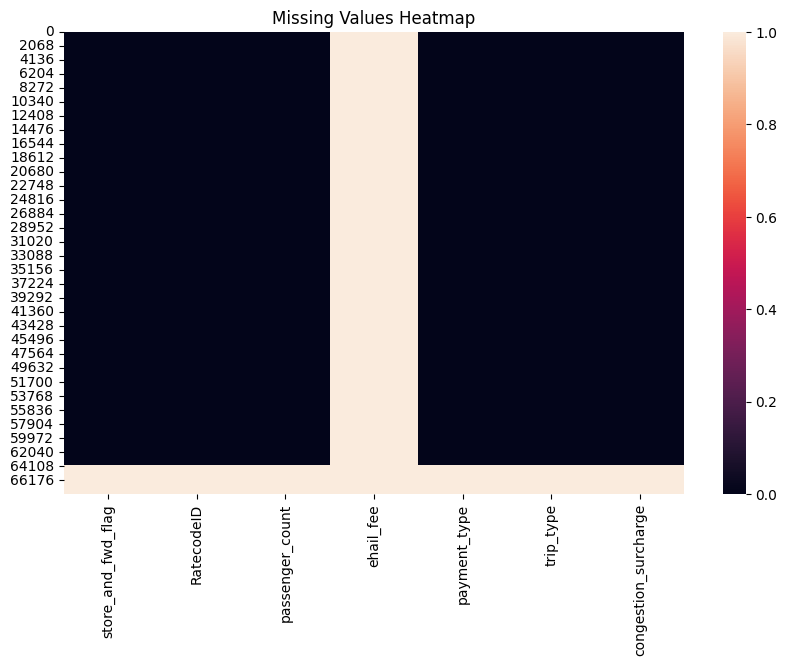

In [80]:
plt.figure(figsize=(10, 6))  # Ukuran grafik lebih proporsional
sns.heatmap(df[missing_value.index].isna())

plt.title("Missing Values Heatmap")
plt.show()

Insight:
* Pada kolom `ehail_fee` 100% data berisi null **MNAR (Missing Not at Random)**, kita bisa langsung hapus kolomnya
* Jika kita lihat pada visualisasi persebaran nilai kosong dapat diketahui bahwa data yang kosong pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` memiliki posisi yang sama atau pada baris yang sama. kita bisa berasumsi bahwa jenis missing value pada dataset ini adalah **MAR (Missing at Random)** karenakan nilai yang hilang dikarena kesalahan teknis pada data itu sendiri sehingga datanya kosong dan mempengarui terjadi kekosongan pada variabel lainnya.

In [105]:
df[df["store_and_fwd_flag"].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


### Solution

In [ ]:
# Hapus kolon 100% kosong
df.drop(columns="ehail_fee", inplace=True)

In [ ]:
# Hapus baris yang memiliki posisi kosong yang sama
df = df.drop(df[df["payment_type"].isnull()].index)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [128]:
df.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

In [129]:
df[df["trip_type"].isnull()]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


Insight:
* Setelah kita menangani missing value pertama selanjutnya kita cek lagi apakah masih ada missing valuenya
* Dapat diketahu masih ada 10 baris pada kolom `trip_type` yang memiliki nilai kosong dan bersamaan memiliki nilai 99 pada `RatecodeID` yang merupakan anomali juga

In [157]:
df = df.drop(df[df["trip_type"].isnull()].index)
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Setelah kita menangani missing value selanjutnya kita menangani kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang seharusnya memiliki tipe data berupa datetime namum pada dataset memiliki tipe string/object

In [158]:
# Ubah tipe data kolom menjadi datetime
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

### Cleaned Data

Sebelum dibersihkan, kita memiliki  68211 baris dan 20 kolom, sekarang kita memiliki 63877 baris dan 19 kolom. Sekitar 4334 baris data yang kosong dihapus. <br>
sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan:

In [163]:
pd.reset_option('display.max_colwidth')
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

NewDesc = pd.DataFrame(columns=['Column Name', 'type','null', 'Number of Unique', 'Unique Sample'], data=listItem)
NewDesc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62665,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0,62602,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,463,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Sebagai pelengkap mari kita tambahkan kolom `Borough` dan `Zone` berdasarkan LocationID agar mudah dibaca. data tambahan ini bersumber dari luar dataset yang dapat diunduh [disini](https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/taxi-zone-lookup.csv)

In [170]:
df_zone = pd.read_csv("taxi-zone-lookup.csv")
df_zone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


Menambahkan Lokasi Penumpang Turun

In [189]:
df = df.merge(df_zone, left_on="DOLocationID", right_on="LocationID", how="left")

In [ ]:
df = df.drop(columns="LocationID")

In [199]:
df.rename(columns={"Borough": "Drop Borough", "Zone":"Drop Zone"},inplace=True)

Menambahkan Lokasi Penumpang Naik

In [200]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Drop Borough,Drop Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,East Harlem North


In [204]:
df = df.merge(df_zone, left_on="PULocationID", right_on="LocationID", how="left")

In [ ]:
df.drop(columns="LocationID",inplace=True)

In [207]:
df.rename(columns={"Borough": "Pickup Borough", "Zone":"Pickup Zone"}, inplace=True)

Setelah data bersih dan ditambahkan keterangan lokasi naik dan turun penumpang maka data siap digunakan:

In [209]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Drop Borough,Drop Zone,Pickup Borough,Pickup Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Lincoln Square West,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Central Park,Manhattan,Bloomingdale
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Old Astoria,Queens,Steinway
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Upper West Side North,Manhattan,Central Harlem
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,East Harlem North,Manhattan,Central Harlem
